# External Static B and applied resonant MW Field

Here a single $\text{NV}^-$ center is modeled as a qubit.

First an NV center Hamiltonian with an applied static magnetic field is constructed, and the eigenstates and eigenvalues are observed. The Zeeman effect lifts the degeneracy of the +-1 electron spin states. 

Two particular spin states of the electron state, the |m_s = 0> and |m_s = -1> states, are used as a two-level qubit (|m_s = 0> = |0> and |m_s = -1> = |1>). A superposition of |0> and |1> is shown to rotate about |0> at the expected frequency. 

A resonant MW B field is then applied to the system. To do this, a rotation is added to the Hamiltonian in order to work in a rotating reference frame such that the applied MW field is equivalent to a static field. States are rotated around the X and Y axis for a particular field strength. Finally a resonant $\pi/2$ pulse is shown.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import qutip

In [3]:
import nvmodels
import numpy as np

In [4]:
nv = nvmodels.NVNegativeGroundState()

In [5]:
polar = 0
azimuthal = 0
_x = np.sin(polar)*np.cos(azimuthal)
_y = np.sin(polar)*np.sin(azimuthal)
_z = np.cos(polar)
B_mag = 100e-4  # 100 Gauss in the z direction
static_B_field = B_mag*np.array([_x, _y, _z])
print(static_B_field)

h = nv.zero_field_hamiltonian()
h += nv.nitrogen_hyperfine_hamiltonian()
h += nv.nitrogen_electric_quadrupole_hamiltonian()
h += nv.static_mag_field_hamiltonian(static_B_field, include_nucleus = True)

[0.   0.   0.01]


In [6]:
h

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 1.23314270e+09  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.24032346e+09  0.00000000e+00 -2.70000000e+06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.23748422e+09  0.00000000e+00
  -2.70000000e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -2.70000000e+06  0.00000000e+00 -1.91503410e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.70000000e+06  0.00000000e+00
  -1.90999333e+09  0.00000000e+00 -2.70000000e+06  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.91497257e+09  0.00000000e+00 -2.70000000e+06
   0.00000000e+00

In [48]:
eigenvalues, eigenstates = h.eigenstates()

eigenvalues = eigenvalues - np.min(eigenvalues)

state_probs_text = [nvmodels.utilities.two_qutrit_state_to_text(s, decimals=5) for s in eigenstates]

fig = nvmodels.plotting.plot_eigenspectrum(eigenvalues, state_probs_text, ylabel='Energy (Hz)')
fig.show()

In [ ]:
# Let's observe state evolution. 


In [ ]:
# Create a state of the NV center where the electron is in a superposition |m_s = 0> + |m_s = -1> 
# and the nitrogen is in the m_i = 0 state. (this is the "central" peak in ODMR for a single NV orientation)

psi_p0 = qutip.tensor( (qutip.basis(3,1) + qutip.basis(3,2)).unit(), qutip.basis(3,1)).unit()# (|0> + |-1>)|0>

In [10]:
psi_p0

Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]]

In [11]:
# super position between two eigenstates of h that correspond ~= psi_p0

s0 = 2
s1 = 5
eigs_0 = eigenstates[s0]
eigv_0 = eigenvalues[s0]

eigs_1 = eigenstates[s1]
eigv_1 = eigenvalues[s1]


In [12]:
psi_sup_exact= (eigs_0 + eigs_1).unit()

In [13]:
nvmodels.utilities.two_qutrit_state_to_text(psi_p0, decimals=3)

'0.707|0,0> + 0.707|-1,0>'

In [14]:
nvmodels.utilities.two_qutrit_state_to_text(psi_sup_exact, decimals=3)

'0.001|1,-1> + 0.707|0,0> + 0.001|0,-1> + 0.001|-1,1> + 0.707|-1,0>'

In [15]:
psi_sup_exact  #almost the same as psi_p0

Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 6.06575716e-04]
 [ 0.00000000e+00]
 [ 7.07106136e-01]
 [-7.35812558e-04]
 [ 7.38053091e-04]
 [ 7.07106398e-01]
 [ 0.00000000e+00]]

In [16]:
qutip.ket2dm(psi_sup_exact).ptrace(0).tidyup(atol=1e-6) # |0> + |-1> / sqrt(2)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         0.         0.        ]
 [0.         0.49999963 0.49999927]
 [0.         0.49999927 0.5       ]]

In [17]:
qutip.ket2dm(psi_sup_exact).ptrace(1).tidyup(atol=1e-3) # |0>

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         0.         0.        ]
 [0.         0.99999855 0.        ]
 [0.         0.         0.        ]]

If we evolve the state over time, we can show that the electron state is rotating about the |0> axis 
at the expected frequency

NB that as we plot the electron spin state on the Bloch sphere our physical spin state is a linear
combination of |-1> and |0>.  But the Bloch sphere represents a two-level system with states labeled as |0> and |1>. We have essentially labeled our physical |m_s = -1> state as |1> on the Bloch sphere and |m_s = 0> = |0>. 

In [18]:
times = np.linspace(0,1.22e-9,25) # 1.22 nanoseconds

In [19]:
result_superpos_tevolve = qutip.sesolve(h, psi_sup_exact, tlist=times)

In [20]:
bloch = nvmodels.plotting.plot_states_on_Bloch(result_superpos_tevolve.states, subsystem=0, plus_zero=False, start_color = "green",
                                      end_color = "red", color = "b")


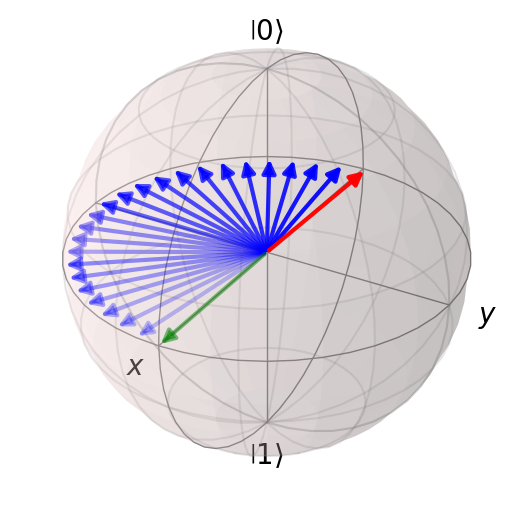

In [21]:
bloch.show()

In [22]:
# Let's rotate to the frame where the this eigenstate should be stationary
rotation_frequency = eigv_1 - eigv_0

In [23]:
print(rotation_frequency*1e-9) #in GHz

2.5896911503352054


In [24]:
h_rot = h + nv.rotate_frame(rotation_frequency, axis='z') # NB: make sure you rotate in the correct direction

In [25]:
result_superpos_tevolve_rotated = qutip.sesolve(h_rot, psi_sup_exact, tlist=times)

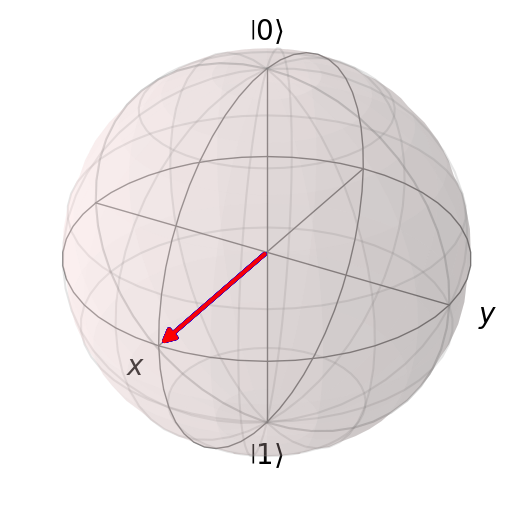

In [26]:
bloch = nvmodels.plotting.plot_states_on_Bloch(result_superpos_tevolve_rotated.states, subsystem=0, plus_zero=False)

bloch.show()

Still stationary for a microsecond!

In [27]:
times = np.linspace(0,1.22e-6,2500) # 1.22 microseconds
result_superpos_tevolve_1mus_rotated = qutip.sesolve(h_rot, psi_sup_exact, tlist=times)

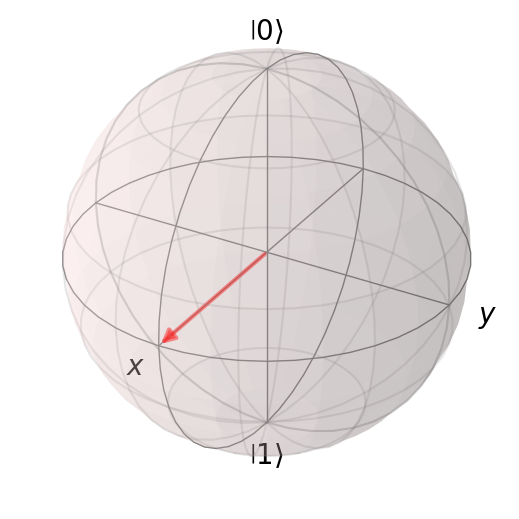

In [28]:
nvmodels.plotting.plot_states_on_Bloch(result_superpos_tevolve_rotated.states[::100], subsystem=0, plus_zero=False)

In [29]:
eigenvalues, eigenstates = h_rot.eigenstates()

eigenvalues = eigenvalues - np.min(eigenvalues)

state_probs_text = [nvmodels.utilities.two_qutrit_state_to_text(s, decimals=5) for s in eigenstates]

fig = nvmodels.plotting.plot_eigenspectrum(eigenvalues, state_probs_text, ylabel='Energy (Hz)')
fig.show()

Our superposition state turns out to be a linear combination of 
two eigenstates that are nearly degenerate

In [30]:
# Our superpostion state of h

nvmodels.utilities.two_qutrit_state_to_text(psi_sup_exact, decimals=6)

'0.001|1,-1> + 0.707|0,0> + 0.001|0,-1> + 0.001|-1,1> + 0.707|-1,0>'

In [31]:
# Linear combination 

nvmodels.utilities.two_qutrit_state_to_text((eigenstates[2] + eigenstates[3]).unit(), decimals=6)

'0.001|1,-1> + 0.707|0,0> + 0.001|0,-1> + 0.001|-1,1> + 0.707|-1,0>'

In [32]:
eigenvalues[2] - eigenvalues[3]

-9.5367431640625e-07

You can also observe that the 0th & 1st eigenstates of h_rot, and the 4th and 5th eigenstates are 
also nearly degenerate. Linear combinations of those states results in a electron state ~|+> = |-1> + |0> but
with different spin states of the nitrogen nucleus.
Finally, states 6, 7, and 8 in the charge above are the eigenstates where the electron spin state = |1>

The utility of rotating to this reference frame is the ability to visualize and understand qubit rotations due to an externa MW field. 

To control our electron state in NV centers we normally apply a MW field at a particular resonance frequency, defined as the transition energy between the electron |0> state and one of the |m_s = +-1> states. Here we are working with the |m_s = -1> state. 

An external MW field at the transition frequency can be modeled as a static field when in the rotating frame of reference. A field along the X direction rotates the qubit around the X-axis and a field along the Y-direction (which is physically done by applying the same field but $\pi/2$ out of phase) rotates the qubit around the Y-axis.


In [33]:
Y_rotation = 300e-6*np.array([0,1,0])  #300 micro tesla field

In [34]:
h_y_rot = h_rot + nv.static_mag_field_hamiltonian(Y_rotation, include_nucleus=False)

In [35]:
times = np.linspace(0,0.5e-6,2500) # 0.5 mus

In [36]:
result_roty = qutip.sesolve(h_y_rot, psi_sup_exact, tlist=times)

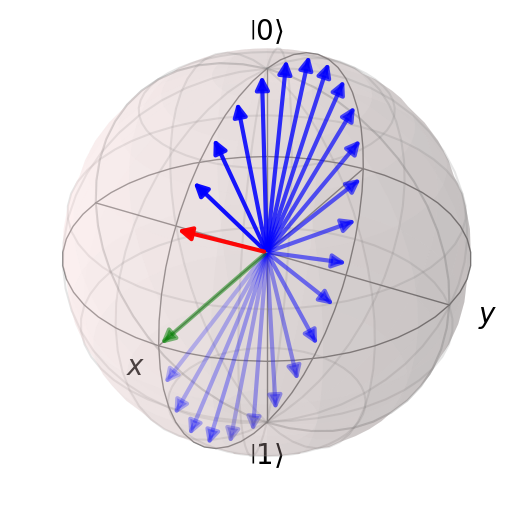

In [37]:
nvmodels.plotting.plot_states_on_Bloch(result_roty.states[::100], subsystem=0, plus_zero=False)

In [38]:
X_rotation = 300e-6*np.array([1,0,0])  #300 micro tesla field

In [39]:
h_x_rot = h_rot + nv.static_mag_field_hamiltonian(X_rotation, include_nucleus=False)

In [40]:
#start with electron in |0> state

In [41]:
psi_00 = qutip.tensor( qutip.basis(3,1), qutip.basis(3,1)).unit()# |0>|0>

In [42]:
result_rotx = qutip.sesolve(h_x_rot, psi_00, tlist=times)

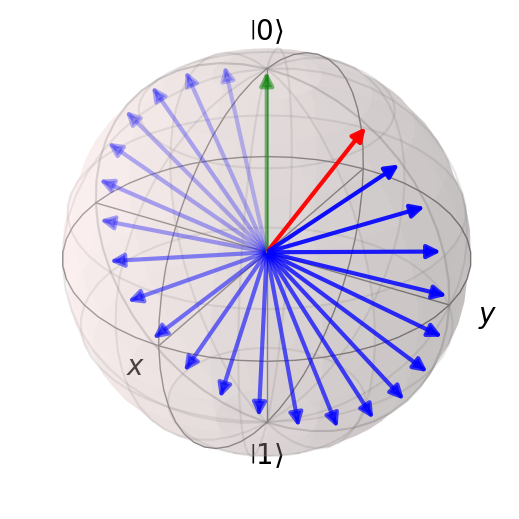

In [43]:
nvmodels.plotting.plot_states_on_Bloch(result_rotx.states[::100], subsystem=0, plus_zero=False)

In [44]:
# rotate the view so we can be sure that it's a rotation around the X axis

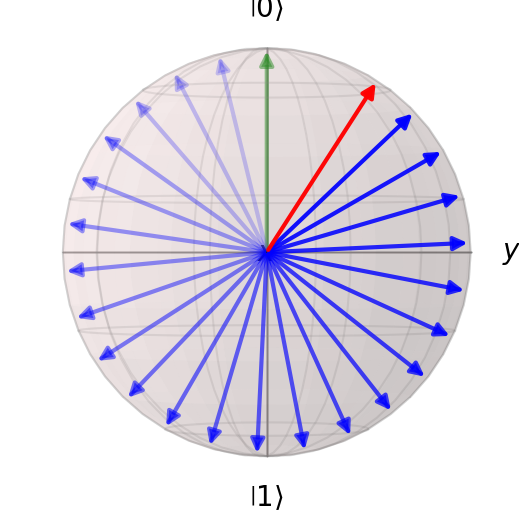

In [45]:
nvmodels.plotting.plot_states_on_Bloch(result_rotx.states[::100], subsystem=0, plus_zero=False, 
                                       bloch_kwargs=dict(view=[-90,0]))

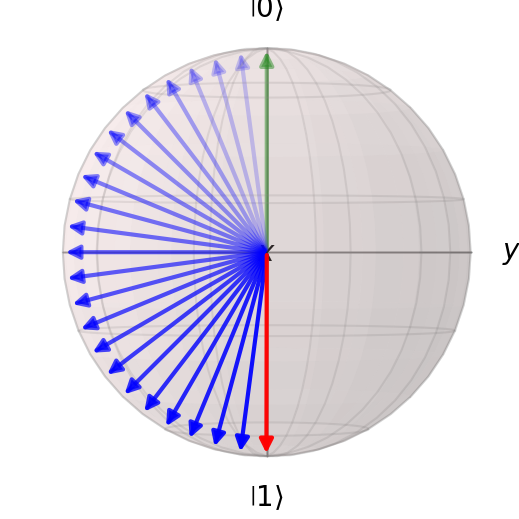

In [46]:
#If we rotate the for the correct amount of time, we get a Rabi pi pulse
times = np.linspace(0,0.275e-6,2500)
result_rotx = qutip.sesolve(h_x_rot, psi_00, tlist=times)
nvmodels.plotting.plot_states_on_Bloch(result_rotx.states[::100], subsystem=0, plus_zero=False, 
                                       bloch_kwargs=dict(view=[-90,0]))

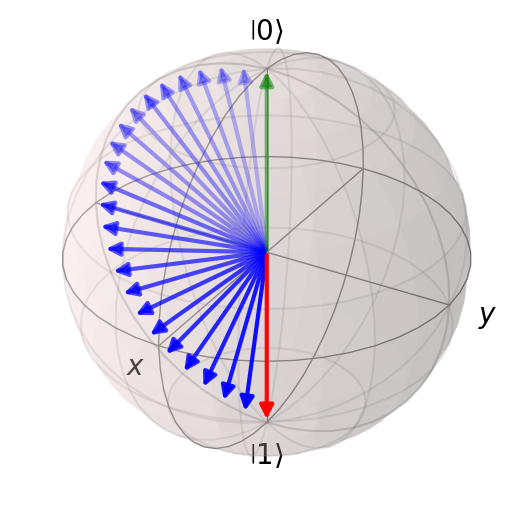

In [47]:
nvmodels.plotting.plot_states_on_Bloch(result_rotx.states[::100], subsystem=0, plus_zero=False)